<a href="https://colab.research.google.com/github/dayviddouglas/ciencia_de_dados_licitacoes_prefeitura_do_recife/blob/test/dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install dash
!pip install plotly-express

In [54]:
import pandas as pd
import requests as req
from io import StringIO
import urllib
import matplotlib.pyplot as plt
import dash as dsh
from dash import Dash, html,dcc
import plotly.express as px

file_id= "1-0_rPre-v9jjAg1hwdK_mbfYUQqfCvYS"
url =  f"https://drive.google.com/uc?id={file_id}"


try:
    response = req.get(url)
    response.encoding = 'utf-8'
    response.raise_for_status()  # Lança um erro para respostas não-sucedidas
    # Usando StringIO para converter o texto em um arquivo em memória e, então, lendo com o Pandas
    csv_raw = StringIO(response.text)
    base = pd.read_csv(csv_raw, encoding='utf-8')



except req.RequestException as e:
    print(f"Erro ao acessar o arquivo: {e}")




In [55]:
base

,comissao_licitacao,ano_processolicitatorio,num_processolicitatorio,numero_lote,modalidadeprocessolicitatorio,numerolicitacaomodalidade,anolicitacaomodalidade,orgao_licitante,objeto,cnpj_contratado,...,num_endcontratado,comp_endcontratado,bairro_endcontratado,cidade_endcontratado,uf_endcontratado,valor_total_estimado,valor_totalhomologadolicitacao,valor_licitacao_lote,data_aberturaproposta,data_ultimafaseprocesso
0,COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO -...,2012,29,1,PREGÃO ELETRÔNICO,27,2012,SECRETARIA DE EDUCAÇÃO,MATERIAL GRÁFICO,758606000190.0,...,301.0,NaN,BULTRINS,OLINDA,PE,333750.00,66358.00,15210.00,2012-12-20 10:00:00,2013-01-07
1,COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO -...,2012,29,2,PREGÃO ELETRÔNICO,27,2012,SECRETARIA DE EDUCAÇÃO,MATERIAL GRÁFICO,7211171000109.0,...,5327.0,NaN,CANDEIAS,JABOATAO DOS GUARARAPES,PE,333750.00,66358.00,51148.00,2012-12-20 10:00:00,2013-01-07
2,COMISSÃO PERMANENTE DE LICITAÇÃO DE EDUCAÇÃO -...,2012,30,1,PREGÃO ELETRÔNICO,28,2012,SECRETARIA DE EDUCAÇÃO,AGENDA ESCOLAR 2013,13898993000102.0,...,0.0,LOJA 005,CIDADE UNIVERSITARIA,MACEIO,AL,530469.54,357895.02,357895.02,2013-01-02 10:00:00,2013-01-09
3,COMISSÃO PERMANENTE DE LICITAÇÃO DE MATERIAIS ...,2012,23,4,PREGÃO ELETRÔNICO,23,2012,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE PNEUS, PARA ATENDER AS NECESSIDAD...",10511406000192.0,...,810.0,LOJA 01,PRAZERES,JABOATAO DOS GUARARAPES,PE,16870.35,1518.00,800.00,2012-12-19 11:00:00,2013-03-01
4,COMISSÃO PERMANENTE DE LICITAÇÃO DE MATERIAIS ...,2012,23,5,PREGÃO ELETRÔNICO,23,2012,FUNDO MUNICIPAL DE SAUDE,"AQUISIÇÃO DE PNEUS, PARA ATENDER AS NECESSIDAD...",10511406000192.0,...,810.0,LOJA 01,PRAZERES,JABOATAO DOS GUARARAPES,PE,16870.35,1518.00,718.00,2012-12-19 11:00:00,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19103,GC-SEPLAGTD-003,2024,4,7,PREGÃO ELETRÔNICO,4,2024,FUNDO MUNICIPAL DE SAUDE,"REGISTRO DE PREÇOS, COM VALIDADE DE 12 (DOZE) ...",29868059000188.0,...,215.0,ANDAR 1 SL 103,CENTRO,AFOGADOS DA INGAZEIRA,PE,139923.19,110275.52,26000.00,2024-04-18 09:00:00,2024-05-15
19104,GC-SEPLAGTD-003,2024,4,8,PREGÃO ELETRÔNICO,4,2024,FUNDO MUNICIPAL DE SAUDE,"REGISTRO DE PREÇOS, COM VALIDADE DE 12 (DOZE) ...",29868059000188.0,...,215.0,ANDAR 1 SL 103,CENTRO,AFOGADOS DA INGAZEIRA,PE,139923.19,110275.52,28080.00,2024-04-18 09:00:00,2024-05-15
19105,GC-SEPLAGTD-008,2024,9,1,PREGÃO ELETRÔNICO,1,2024,SECRETARIA DE INFRAESTRUTURA,CONTRATAÇÃO PARCELADA DOS SERVIÇOS DE DEMOLIÇÃ...,70215447000163.0,...,537.0,NaN,CURADO,RECIFE,PE,12472497.12,10048265.12,10048265.12,2024-04-18 14:00:00,2024-05-28
19106,GC-SEPLAGTD-008,2024,13,1,PREGÃO ELETRÔNICO,2,2024,SECRETARIA DE INFRAESTRUTURA,"CAÇAMBA ESTACIONÁRIA, COM CAPACIDADE DE NO MÍN...",10811370000162.0,...,550.0,NaN,CANDEIAS,JABOATAO DOS GUARARAPES,PE,2985899.18,2449956.60,2449956.60,2024-05-06 14:00:00,2024-06-03


<IPython.core.display.Javascript object>

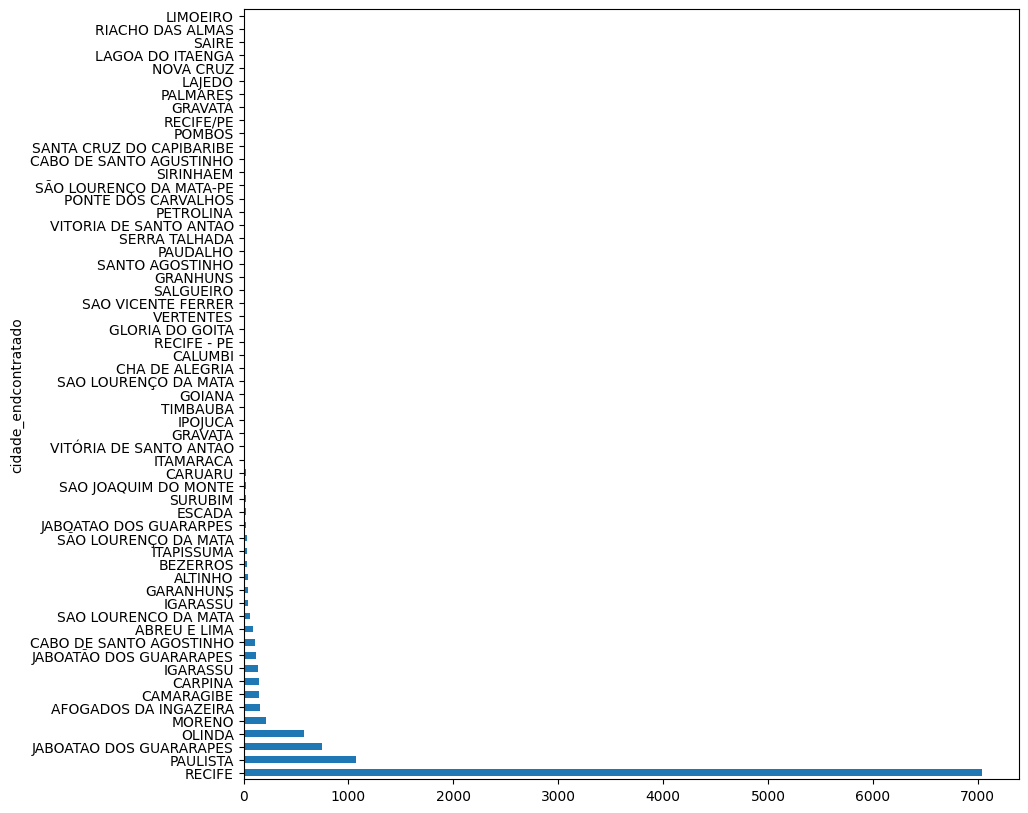

In [63]:
app= Dash(__name__)

process_pe=base[base["uf_endcontratado"]== "PE"]
process_pe["cidade_endcontratado"].value_counts()
# process_pe["cidade_endcontratado"].value_counts().plot(kind='barh', figsize=(10, 10))
# plt.title('Quantidade de processos em pernambuco por cidades.')
# plt.xlabel('Processos')
# plt.ylabel('Cidades')
# plt.gca().invert_yaxis()
# plt.xticks(rotation=90, fontsize=8)
# plt.show()

app.layout=html.Div(children=[
    html.H1(children="Processos de Contratação"),
    dcc.Graph(id= "gráfico-processos-pe-por-cidade", figure=process_pe["cidade_endcontratado"].value_counts().plot(kind='barh', figsize=(10, 10)))
])


if __name__=='__main__':
    app.run_server(debug=True)
